In [1]:
%config InlineBackend.figure_format = "svg"

from src.networks.nodes import StaticNode, StaticActionNode, StaticUtilityNode
from src.networks.dn import DecisionNetwork

# Decision Networks

## Creating the decision network structure

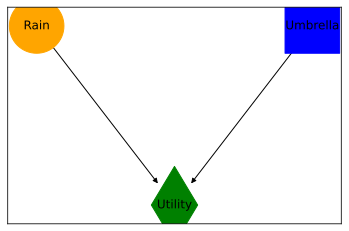

In [2]:
# Create the nodes for the network
rain = StaticNode("Rain", value_range=(0, 1))
umbrella = StaticActionNode("Umbrella", value_range=(0, 1))
utility = StaticUtilityNode("Utility", value_range=(0, 1))

# Create the network structure
dn = DecisionNetwork()
dn.add_nodes([rain, umbrella, utility])
dn.add_edges([("Rain", "Utility"), ("Umbrella", "Utility")])
dn.draw()

## Populate the Decision Network with data

In [3]:
# Add data for node Rain
data = {"Rain": [0,1], "Prob": [0.8, 0.2]}
dn.add_pt("Rain", data)

# Add data for node utility
data = {"Rain": [0,0,0,0,1,1,1,1], "Umbrella": [0,0,1,1,0,0,1,1], "Utility": [0,1,0,1,0,1,0,1], "Prob":[0,1,1,0,1,0,0,1]}
dn.add_pt("Utility", data)

## Classical query for the best decision

In [4]:
# Initialize dn
dn.initialize()

In [5]:
dn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100)

{'Umbrella': 1}

## Quantum-Classical query for the best decision

In [6]:
dn.query_decision(query="Utility", evidence={"Rain": 1}, n_samples=100, quantum=True)

{'Umbrella': 1}